In [ ]:
import requests

import numpy as np
import pandas as pd

In [ ]:
namelist=[]
historical_sold_list=[]
liked_count_list=[]
brand_list=[]
price_min_list=[]
price_max_list=[]
has_lowest_price_guarantee_list=[]
discount_list=[]
rating_star_list=[]
freeshipping_list=[]
shoplocation_list=[]

def main(mouse, items_number=100):
    
    url = "https://shopee.com.my/api/v4/search/search_items"

    params = {
        "by": "relevancy",
        "keyword": mouse,
        "limit": 100,  # default value at start
        "newest": 0,   # default value at start
        "order": "desc",
        "page_type": "search",
        "scenario": "PAGE_GLOBAL_SEARCH",
        "version": "2"
    }
    
    for offset in range(0, items_number, 100):

        #print('\n--- offset:', offset, '---\n')

        params["newest"] = offset   # other parameters are the same
        
        limit = items_number - offset
        if limit < 100:
            params["limit"] = limit
        
        r = requests.get(url, params=params)
        data = r.json()    

        print('>> items number in data:', len(data['items']), '\n')
        
        for number, item in enumerate(data['items']):

            #print('number:', offset+number+1)
            
            basic = item['item_basic']
            
            # print('keys:', basic.keys())
            # for key, value in basic.items():
            # print(f"{key}: {value}")
            
            # NAME
            name = basic['name']
            #name = basic.get('name', '- unknown -')  # safer if `name` may not exists in `data`
            #print("Name:", name)
            namelist.append(name)

            #SOLD
            historical_sold_list.append(basic['historical_sold'])

            #FAVOURITE
            liked_count_list.append(basic['liked_count'])

        
            # BRAND
            #brand = basic['brand']
            brand = basic.get('brand')  # safer if `brand` may not exists in `data`
            if brand is None:
                brand_list.append('NaN')
            else:
                brand_list.append(brand)

            #PRICE_MIN
            price_min_list.append(basic.get('price_min'))

            #PRICE_MAX
            price_max_list.append(basic.get('price_max'))

            #DISCOUNT
            discount=basic.get('discount')
            if discount is None:
              discount_list.append('0%')
            else:
              discount_list.append(discount)

            #LOWEST PRICE GUARANTEE
            has_lowest_price_guarantee_list.append(basic['has_lowest_price_guarantee'])

            #RATING STAR
            rating_star_list.append(basic['item_rating']['rating_star'])

            #FREE SHIPPING
            freeshipping_list.append(basic['show_free_shipping'])
            
            #SHOPLOCATION
            shoplocation_list.append(basic['shop_location'])

            #print('---')

          
# --- main ---

main("mouse")
#main("make-up", 60)
#main("make-up", 270)


>> items number in data: 100 



In [ ]:
df = pd.DataFrame({'Name':namelist ,
                   'No of Sold':historical_sold_list, 
                   'Favourite':liked_count_list, 
                   'Brand':brand_list,
                   'Price Min(RM)':price_min_list,
                   'Price Max(RM)':price_max_list,
                   'Lowest Price Guarantee':has_lowest_price_guarantee_list,
                   'Discount(%)':discount_list,
                   'Rating':rating_star_list,
                   'Free Shipping':freeshipping_list,
                   'ShopLocation':shoplocation_list})

In [ ]:
df.head(10)

,Name,No of Sold,Favourite,Brand,Price Min(RM),Price Max(RM),Lowest Price Guarantee,Discount(%),Rating,Free Shipping,ShopLocation
0,🔥ready stock🔥Wireless Mouse Bluetooth 2.4Ghz R...,21856,3757,OEM,1230000,1790000,False,54%,4.860808,False,Selangor
1,Apple Magic Mouse,67,44,NaN,31900000,31900000,False,0%,4.897436,False,Perak
2,🔥Ready stock🔥wireless mouse 2.4G Computer mous...,1240,494,NaN,1990000,1990000,True,50%,4.962963,False,Selangor
3,M330 Wireless Mouse 2.4GHz USB 1000 DPI Mute O...,2536,346,NaN,1780000,1780000,False,91%,4.863492,False,Selangor
4,Gaming Mouse 3200DPI Adjustable Silent Mouse O...,1074,384,NaN,380000,1220000,True,85%,4.878521,False,Kuala Lumpur
5,Lenovo M20 USB 1000 DPI Wired Mini Optical Mou...,11929,673,OEM,355000,984000,True,2%,4.879795,False,Selangor
6,Tetikus Mekanikal Mechanical Gaming Mouse USB ...,1965,455,NaN,1055000,1055000,True,68%,4.818642,False,Selangor
7,Pebble M350 Wireless Bluetooth Mouse Original ...,345,69,NaN,1933000,1933000,False,90%,4.942029,False,Selangor
8,"Logitech M90 Wired USB Mouse, 1000 DPI Optical...",17970,1286,Logitech,1590000,1590000,True,41%,4.928882,False,Selangor
9,M330 Wireless Mouse 2.4GHz USB 1000 DPI Mute O...,2536,346,NaN,1780000,1780000,False,91%,4.863492,False,Selangor


In [ ]:
len(df)

100

In [ ]:
df.dtypes

Name                       object
No of Sold                  int64
Favourite                   int64
Brand                      object
Price Min(RM)               int64
Price Max(RM)               int64
Lowest Price Guarantee       bool
Discount(%)                object
Rating                    float64
Free Shipping                bool
ShopLocation               object
dtype: object

**Data Cleaning for Price**

In [ ]:
df["Price Min(RM)"]=df['Price Min(RM)']/100000
df["Price Max(RM)"]=df['Price Max(RM)']/100000

**Data Cleaning for Brand**

In [ ]:
df['Brand'].unique()

array(['OEM', 'NaN', 'Logitech', 'Razer', 'HP', 'Targus', 'T-Wolf',
       'Philips', 'No Brand', 'Alcatroz', 'Sensonic', 'Fantech',
       'Gaming Freak', 'Thunderobot', '0', 'Armaggeddon', 'Logitech G',
       '', 'Delux'], dtype=object)

In [ ]:
df['Brand'] = df['Brand'].replace({'No Brand':'NaN', '0': 'NaN', '': 'NaN', 'None':'NaN'})

In [ ]:
df['Brand'].unique()

array(['OEM', 'NaN', 'Logitech', 'Razer', 'HP', 'Targus', 'T-Wolf',
       'Philips', 'Alcatroz', 'Sensonic', 'Fantech', 'Gaming Freak',
       'Thunderobot', 'Armaggeddon', 'Logitech G', 'Delux'], dtype=object)

**Data Cleaning for Discount**

In [ ]:
df["Discount(%)"] = df['Discount(%)'].replace({'%': ''}, regex=True).map(pd.eval).astype(int)

**Data Cleaning for Rating**

In [ ]:
df['Rating'] = df['Rating'].round(2)

**Data Categorising for Shop Location**

In [ ]:
df['ShopLocation'].unique()

array(['Selangor', 'Perak', 'Kuala Lumpur', 'Johor', 'Mainland China'],
      dtype=object)

In [ ]:
df['ShopLocationCategory']='Local'
df.loc[df['ShopLocation'] == 'Korea', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Vietnam', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Mainland China', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Taiwan', 'ShopLocationCategory'] = 'Overseas'

In [ ]:
df.head(10)

,Name,No of Sold,Favourite,Brand,Price Min(RM),Price Max(RM),Lowest Price Guarantee,Discount(%),Rating,Free Shipping,ShopLocation,ShopLocationCategory
0,🔥ready stock🔥Wireless Mouse Bluetooth 2.4Ghz R...,21856,3757,OEM,12.30,17.90,False,54,4.86,False,Selangor,Local
1,Apple Magic Mouse,67,44,NaN,319.00,319.00,False,0,4.90,False,Perak,Local
2,🔥Ready stock🔥wireless mouse 2.4G Computer mous...,1240,494,NaN,19.90,19.90,True,50,4.96,False,Selangor,Local
3,M330 Wireless Mouse 2.4GHz USB 1000 DPI Mute O...,2536,346,NaN,17.80,17.80,False,91,4.86,False,Selangor,Local
4,Gaming Mouse 3200DPI Adjustable Silent Mouse O...,1074,384,NaN,3.80,12.20,True,85,4.88,False,Kuala Lumpur,Local
5,Lenovo M20 USB 1000 DPI Wired Mini Optical Mou...,11929,673,OEM,3.55,9.84,True,2,4.88,False,Selangor,Local
6,Tetikus Mekanikal Mechanical Gaming Mouse USB ...,1965,455,NaN,10.55,10.55,True,68,4.82,False,Selangor,Local
7,Pebble M350 Wireless Bluetooth Mouse Original ...,345,69,NaN,19.33,19.33,False,90,4.94,False,Selangor,Local
8,"Logitech M90 Wired USB Mouse, 1000 DPI Optical...",17970,1286,Logitech,15.90,15.90,True,41,4.93,False,Selangor,Local
9,M330 Wireless Mouse 2.4GHz USB 1000 DPI Mute O...,2536,346,NaN,17.80,17.80,False,91,4.86,False,Selangor,Local


# Removing outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define a function to plot boxplot
def plot(df,col):
    plt.figure(figsize=(20,8))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[col],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()
    

**Data Cleaning & Visualisation for Number of sold**



In [ ]:
df['No of Sold'].describe()

count      100.000000
mean      2658.340000
std       4793.530464
min          0.000000
25%        211.500000
50%        486.500000
75%       2048.500000
max      22636.000000
Name: No of Sold, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


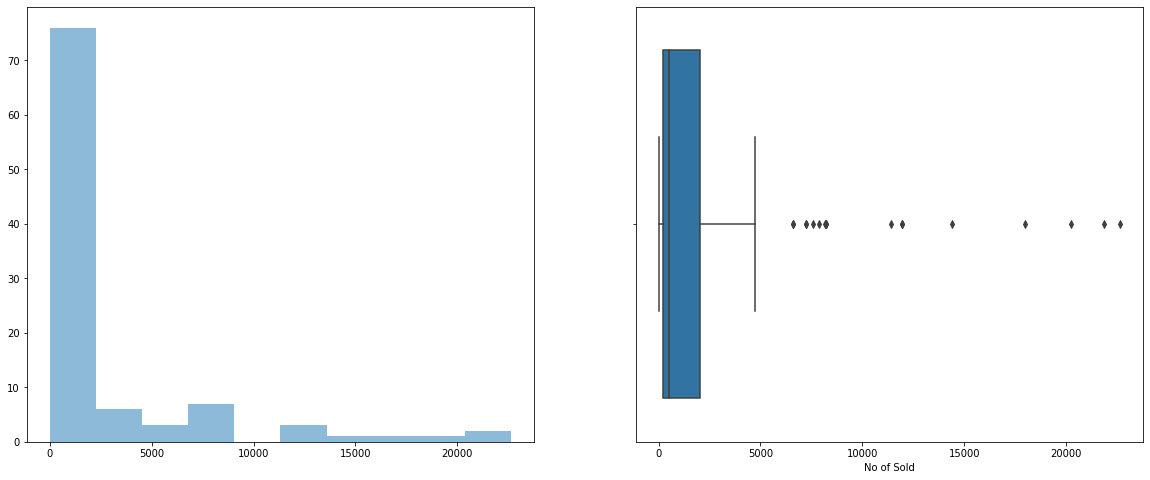

In [ ]:
plot(df,'No of Sold')

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'No of Sold')
print('lower boundary: ',lower_bound)
print('upper boundary: ',upper_bound)

TypeError: ignored

In [ ]:
#replace outliers with lower boundary / upper boundary
df['No of Sold']=np.where(df['No of Sold']>upper_bound, upper_bound,
np.where(df['No of Sold']<lower_bound, lower_bound, df['No of Sold']))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


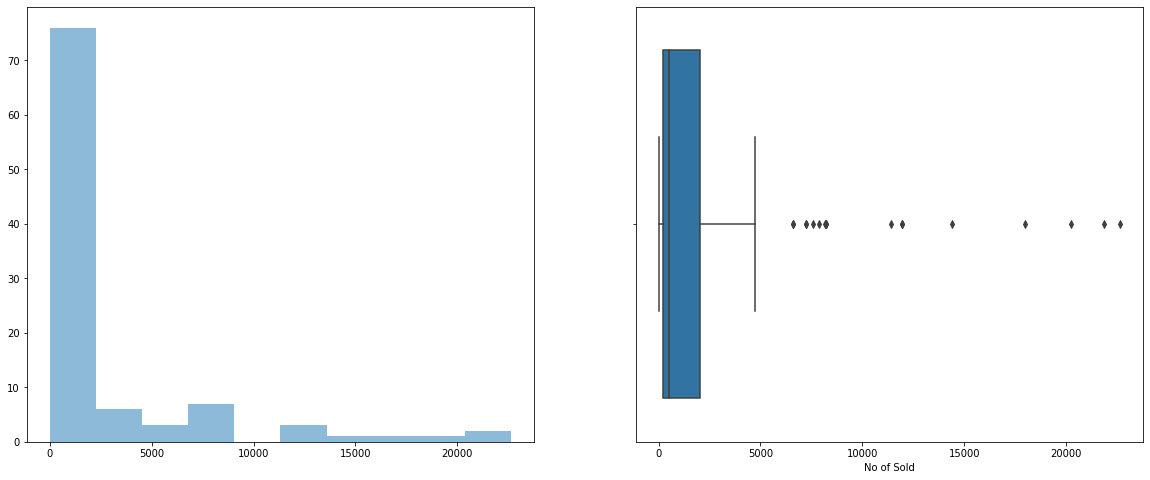

In [ ]:
plot(df,'No of Sold')

**Data Cleaning & Visualisation for Favourite**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


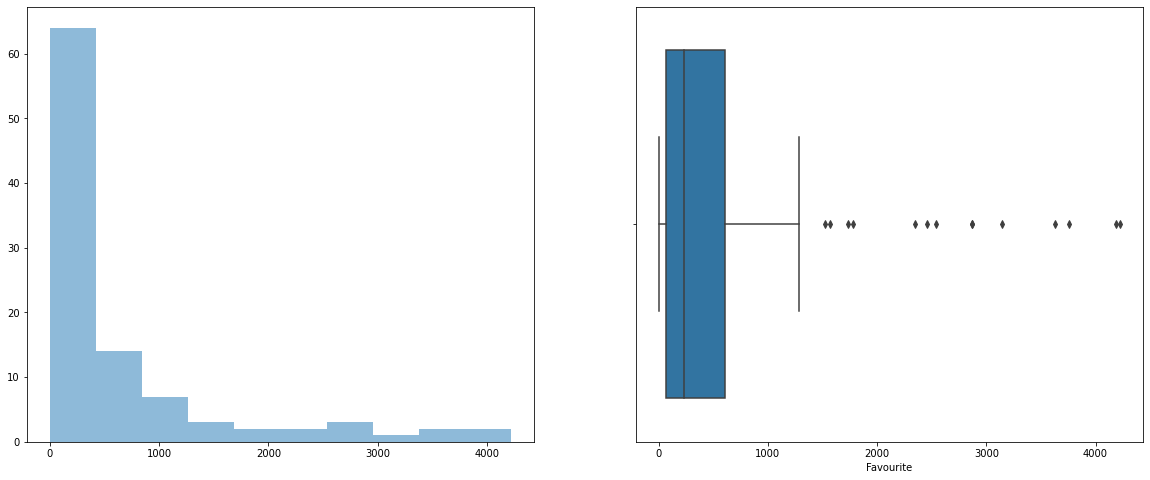

In [ ]:
plot(df,'Favourite')

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'Favourite')
print('lower boundary: ',lower_bound)
print('upper boundary: ',upper_bound)

TypeError: ignored

In [ ]:
#replace outliers with lower or upper boundary
df['Favourite']=np.where(df['Favourite']>upper_bound, upper_bound,
                          np.where(df['Favourite']<lower_bound, lower_bound, df['Favourite']))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


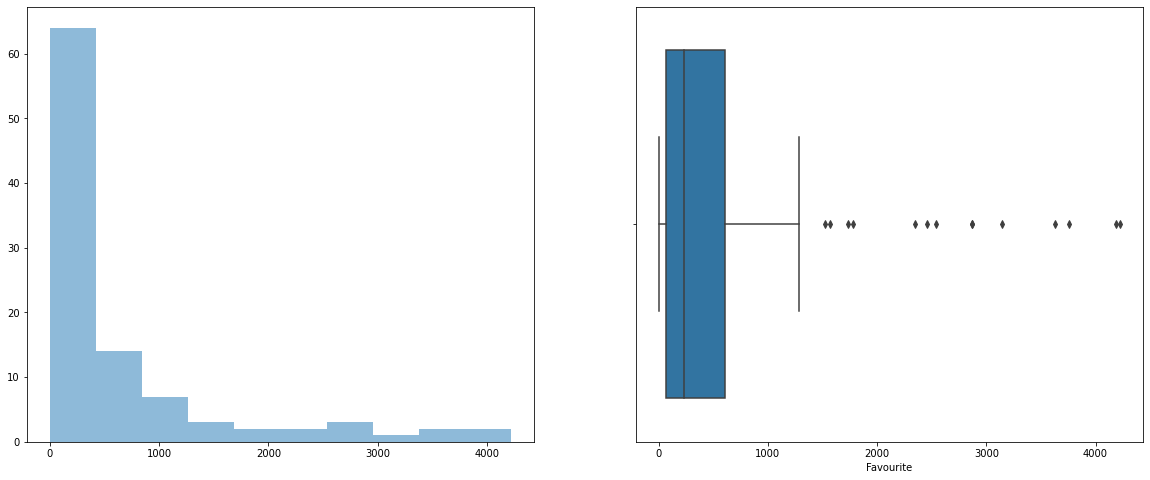

In [ ]:
plot(df,'Favourite')

**Data Cleaning & Visualisation for Rating**

In [ ]:
plot(df,'Rating')

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'Rating')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

#replace outliers with lower/upper boundary
df['Rating']=np.where(df['Rating']>upper_bound, upper_bound,
                          np.where(df['Rating']<lower_bound, lower_bound, df['Rating']))

In [ ]:
plot(df, 'Rating')

In [ ]:
#scatter plot sold & fav 
#showing positive association 
sns.lmplot(y='No of Sold',x='Favourite',data=df,fit_reg=True, height=8)

In [ ]:
#scatter plot sold & price min
#showing negative association 
sns.lmplot(y='No of Sold',x='Price Min(RM)',data=df,fit_reg=True, height=8)

In [ ]:
#scatter plot sold & price max 
#showing negative association 
sns.lmplot(y='No of Sold',x='Price Max(RM)',data=df,fit_reg=True, height=8)

In [ ]:
#scatter plot sold & rating
#weak/no association 
sns.lmplot(y='No of Sold',x='Rating',data=df,fit_reg=True, height=8)

In [ ]:
#scatter plot sold & discount
#weak positive association 
sns.lmplot(y='No of Sold',x='Discount(%)',data=df,fit_reg=True, height=8)

**Free Shipping**

In [ ]:
df['row_num'] = df.reset_index().index

In [ ]:
df_freeshipping_t=df.loc[df['Free Shipping'] == True]
df_freeshipping_f=df.loc[df['Free Shipping'] == False]

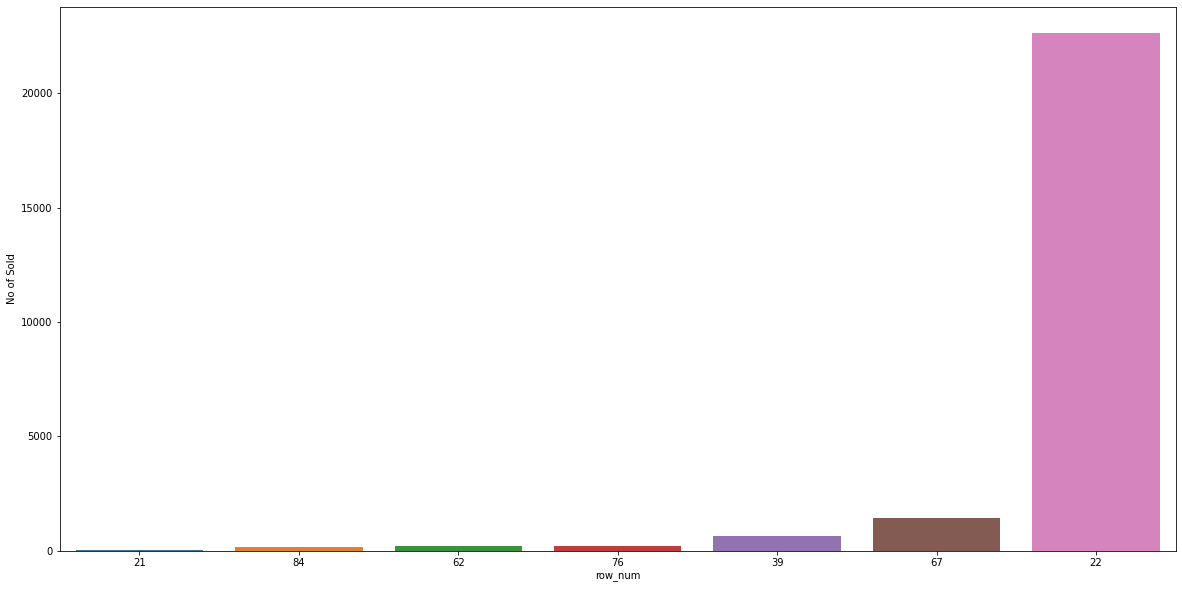

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='row_num',
            y='No of Sold', 
            data=df_freeshipping_t,
            order=df_freeshipping_t.sort_values('No of Sold').row_num)

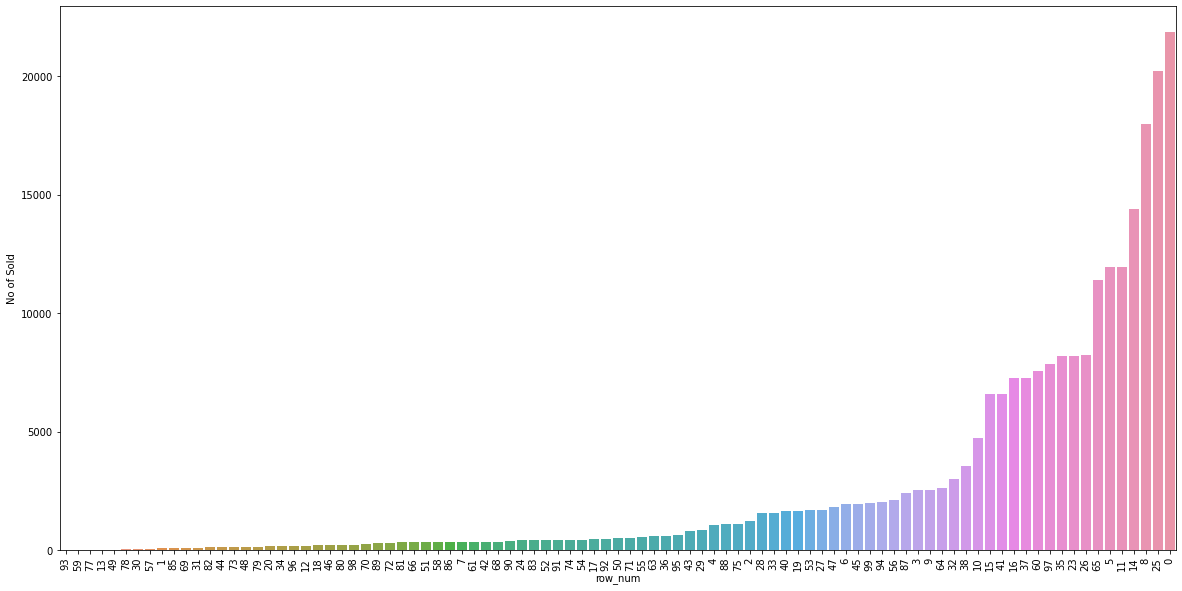

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x='row_num',
            y='No of Sold', 
            data=df_freeshipping_f,
            order=df_freeshipping_f.sort_values('No of Sold').row_num)


**Shop Location**

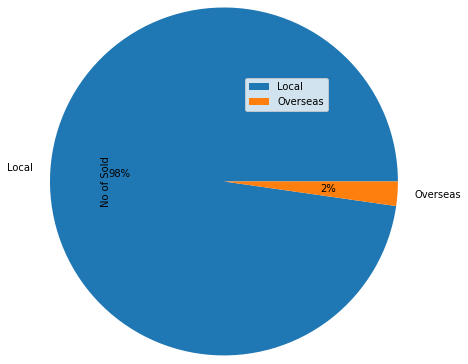

In [ ]:
df.groupby(['ShopLocationCategory']).sum().plot(kind='pie', 
                                                y='No of Sold', 
                                                autopct='%1.0f%%'
                                                ,radius=2
                                                )

#total number of sold for local seller is higher then overseas seller

In [ ]:
df

In [ ]:
df.to_csv('project.csv', index=False)